# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

Após analisar as variáveis posse de imóvel e posse de veículo,  não percebi qualquer relação estatisticamente significante com a variável renda!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv('Profissao- Cientista de Dados_M10_support material.csv')
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df.head(5)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [18]:
df_posse = df[['renda', 'posse_de_imovel', 'posse_de_veiculo']]
df_posse.corr()

,renda,posse_de_imovel,posse_de_veiculo
renda,1.000000,0.029827,0.063414
posse_de_imovel,0.029827,1.000000,-0.014727
posse_de_veiculo,0.063414,-0.014727,1.000000


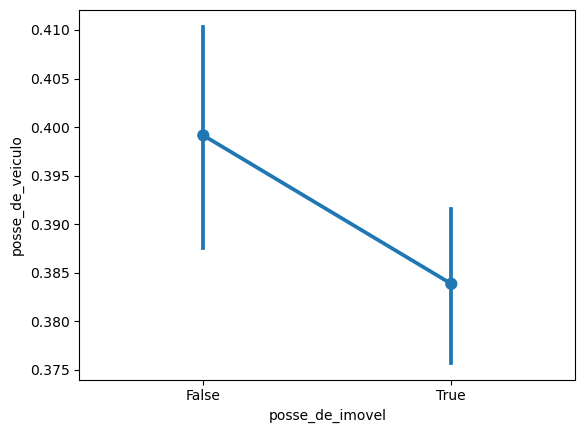

In [13]:
ax = sns.pointplot(x="posse_de_imovel", y="posse_de_veiculo",
                   data=df_posse, dodge=True, ci = 90)

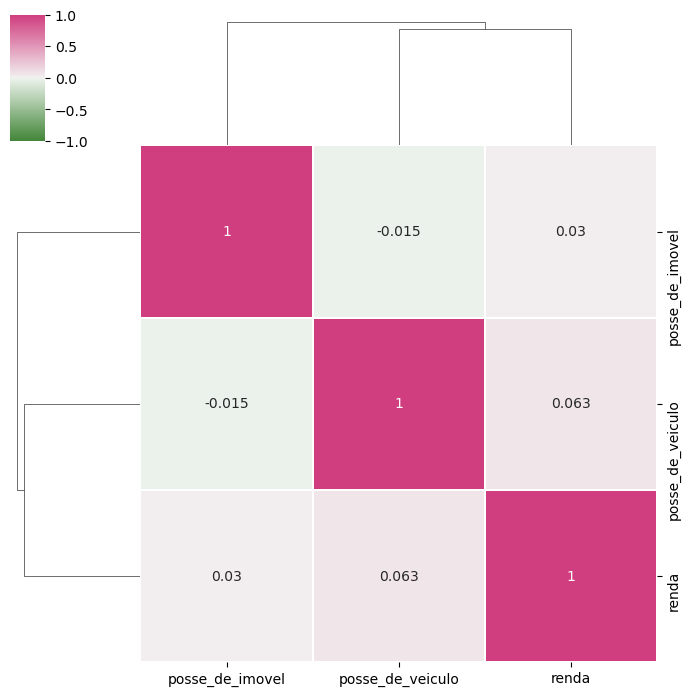

In [16]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')
sns.clustermap(df_posse.corr(), figsize=(7, 7), center = 0, cmap=cmap, vmin=-1, vmax=1, linewidths=0.01, annot=True)
plt.show()

In [48]:
df = df_posse.copy()
df = df.astype({"posse_de_imovel": int, "posse_de_veiculo": int})
pd.crosstab(df['posse_de_veiculo'], df['posse_de_imovel'], df['renda'], aggfunc='median')


posse_de_imovel,0,1
posse_de_veiculo,,
0,2892.16,3179.290
1,3513.70,3627.815


In [30]:
fig = px.scatter(df, x = 'posse_de_veiculo', opacity=0.5, y = 'renda', width = 800)
fig.show()

In [31]:
fig = px.scatter(df, x = 'posse_de_imovel', opacity=0.5, y = 'renda', width = 800)
fig.show()